# Install Dependencies and Setup

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import accuracy_score,mean_squared_error, precision_score, recall_score, f1_score,confusion_matrix,mean_absolute_error, mean_absolute_percentage_error,log_loss

# Importing the Dataset

In [196]:
df = pd.read_csv('winequality-red.csv')

# Exploring the Data

In [197]:
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [198]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [199]:
df.shape

(1599, 12)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Data Cleaning

In [201]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [202]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [203]:
df = df.drop_duplicates()

# Exploratory Data Analysis (EDA)

In [204]:
df['fixed acidity'].duplicated().any()
df['volatile acidity'].duplicated().any()
df['citric acid'].duplicated().any()

True

### 1. Histogram of each features

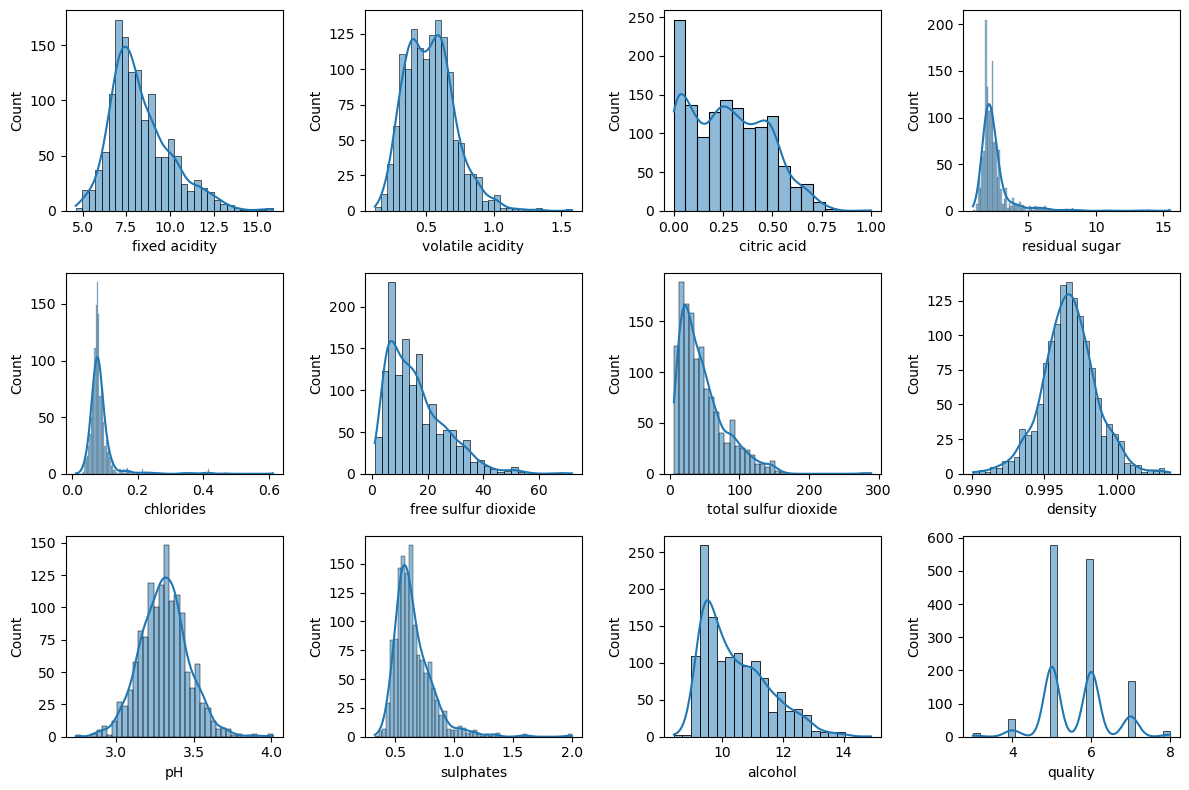

In [205]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 4, 1)
sns.histplot(data=df, x='fixed acidity', kde=True)
plt.subplot(3, 4, 2)
sns.histplot(data=df, x='volatile acidity', kde=True)
plt.subplot(3, 4, 3)
sns.histplot(data=df, x='citric acid', kde=True)
plt.subplot(3, 4, 4)
sns.histplot(data=df, x='residual sugar', kde=True)
plt.subplot(3, 4, 5)
sns.histplot(data=df, x='chlorides', kde=True)
plt.subplot(3, 4, 6)
sns.histplot(data=df, x='free sulfur dioxide', kde=True)
plt.subplot(3, 4, 7)
sns.histplot(data=df, x='total sulfur dioxide', kde=True)
plt.subplot(3, 4, 8)
sns.histplot(data=df, x='density', kde=True)
plt.subplot(3, 4, 9)
sns.histplot(data=df, x='pH', kde=True)
plt.subplot(3, 4, 10)
sns.histplot(data=df, x='sulphates', kde=True)
plt.subplot(3, 4, 11)
sns.histplot(data=df, x='alcohol', kde=True)
plt.subplot(3, 4, 12)
sns.histplot(data=df, x='quality', kde=True)

plt.tight_layout()
plt.show()

### 2. Pair plot of each features

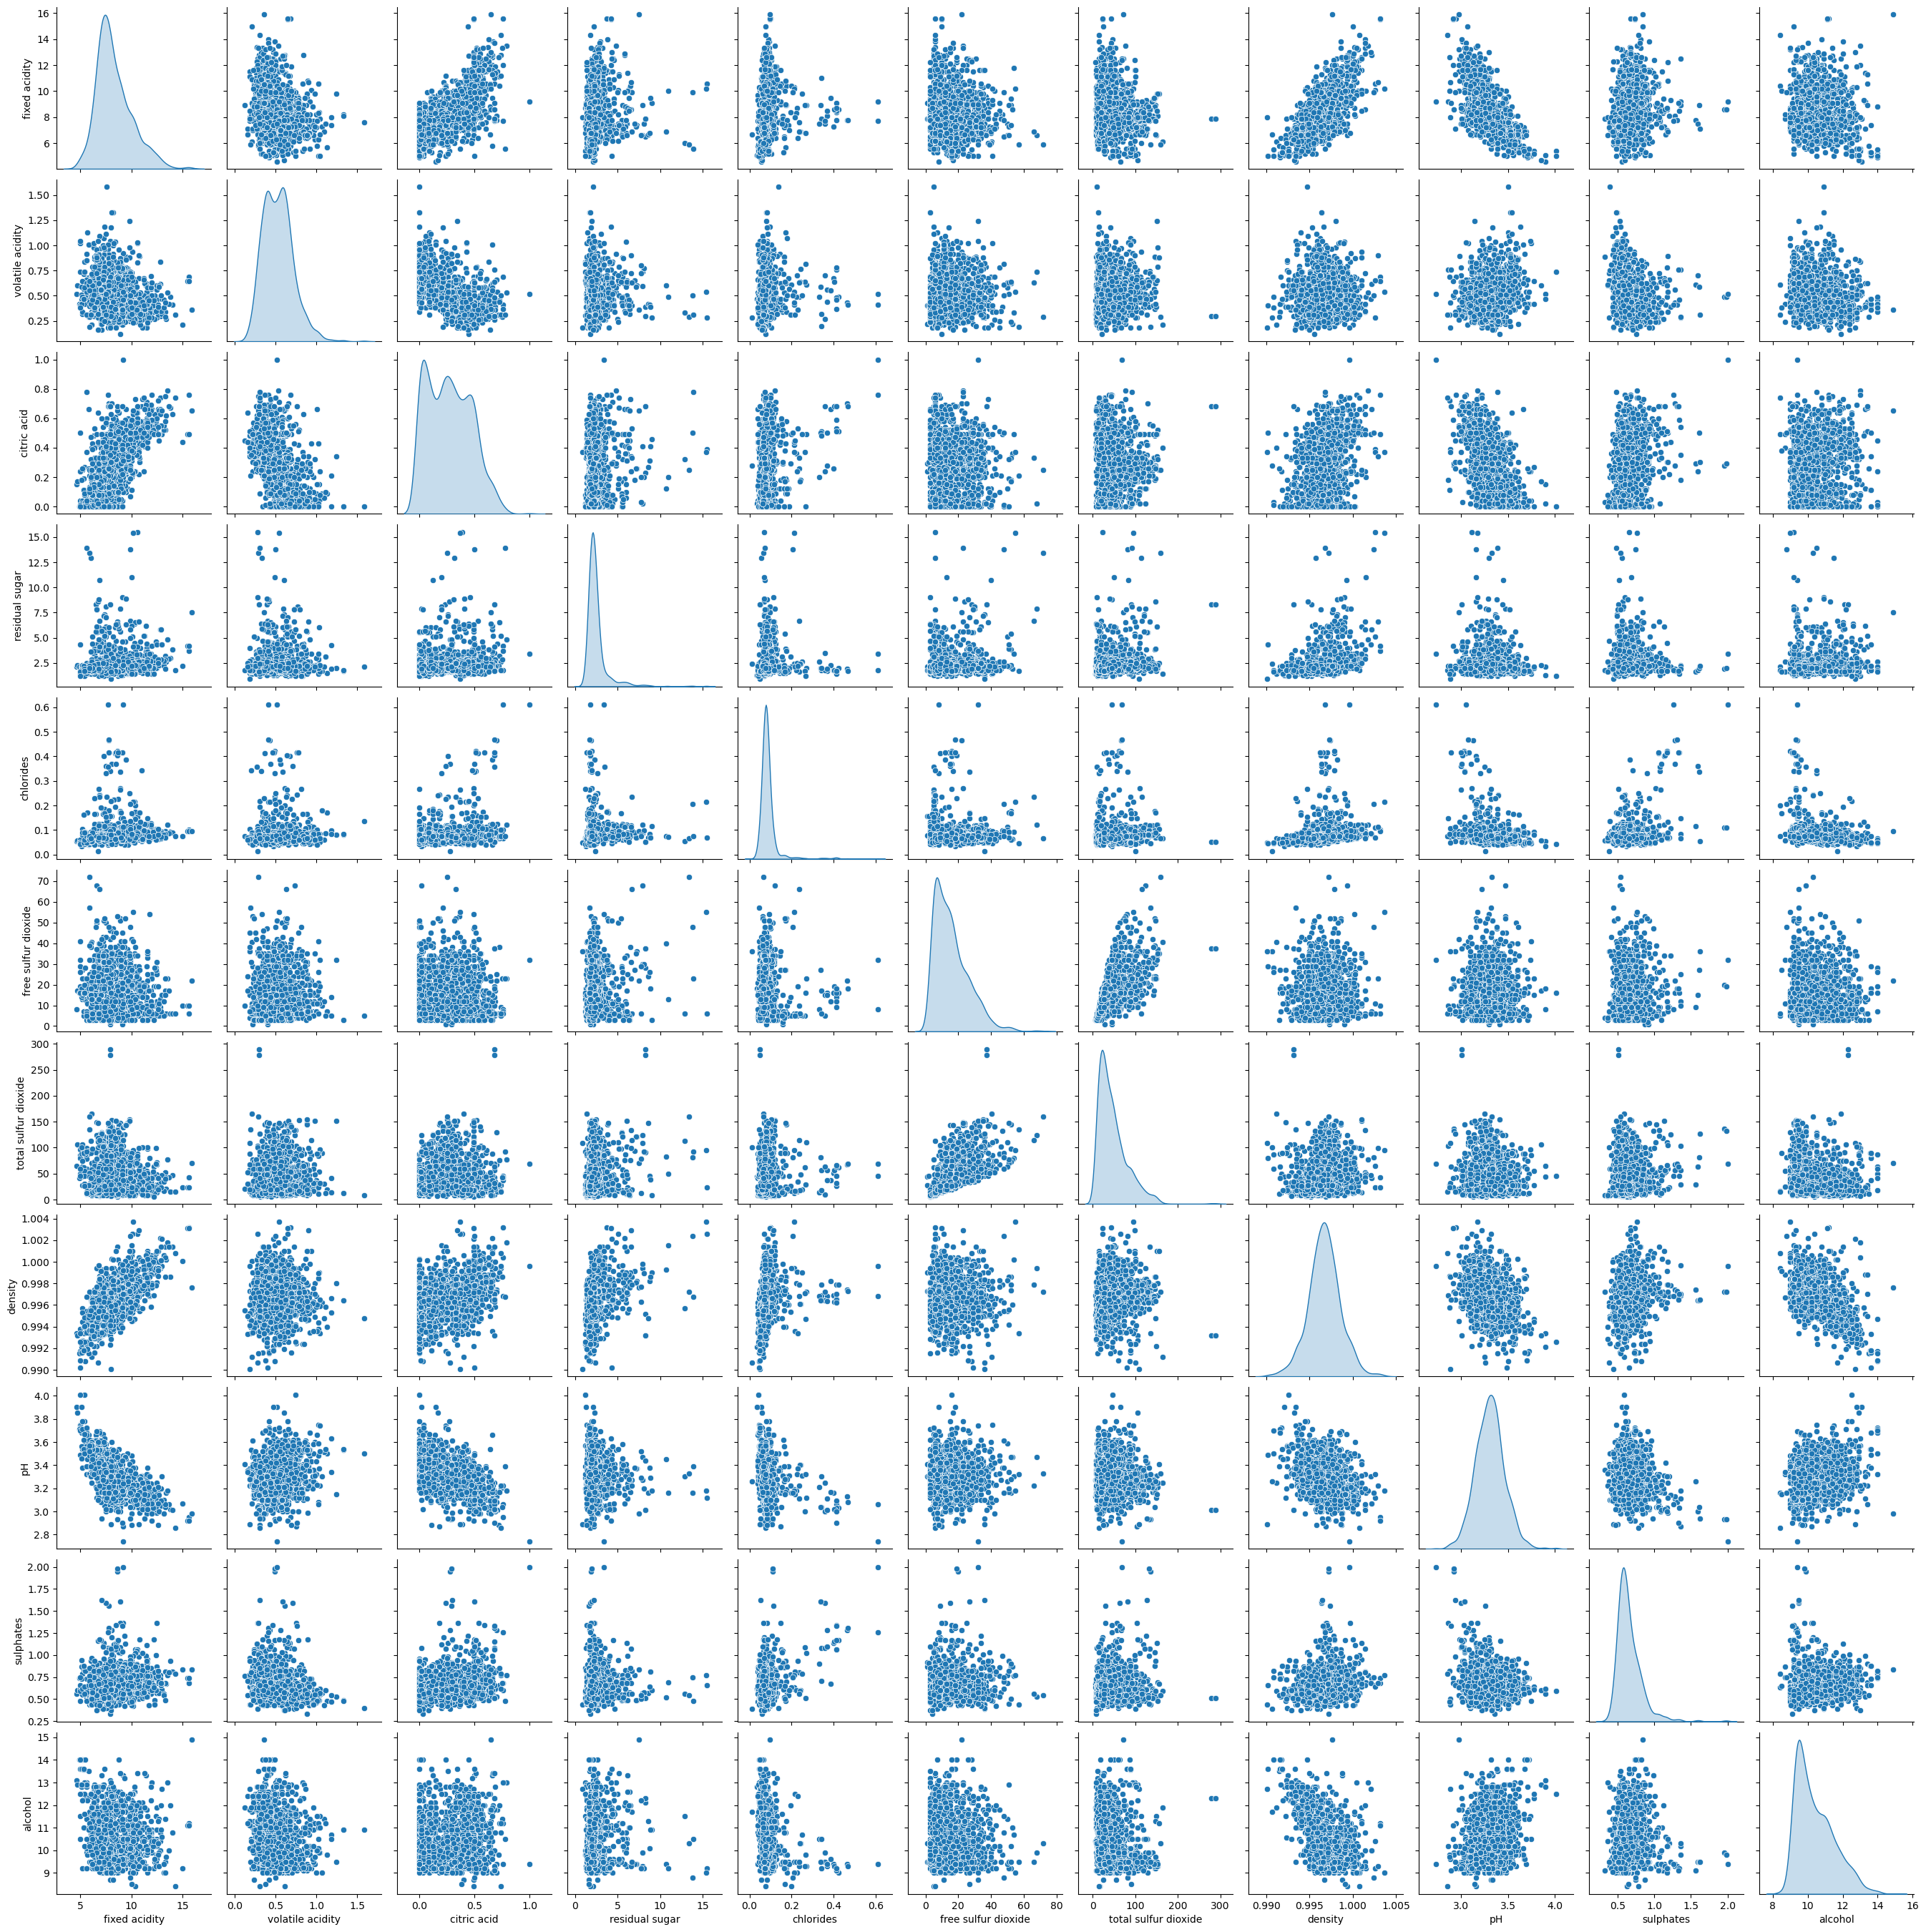

In [206]:
sns.pairplot(data=df, vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
                             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], diag_kind='kde')
plt.show()

### 3. Correlation Heatmap

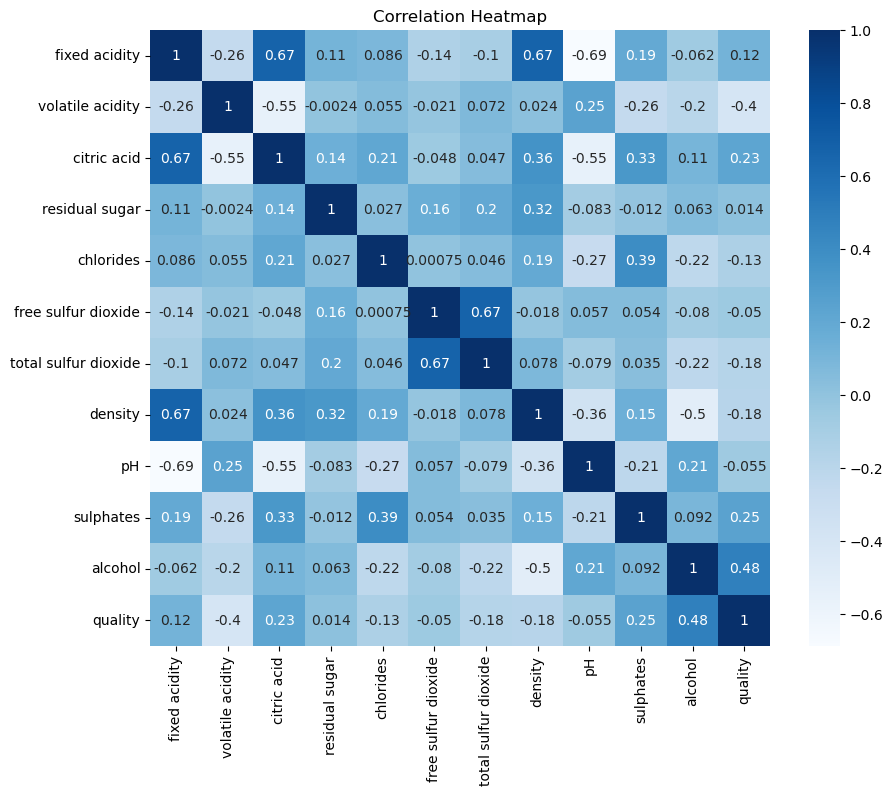

In [207]:
corr_matrix = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
                   'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

### 4. Boxplot

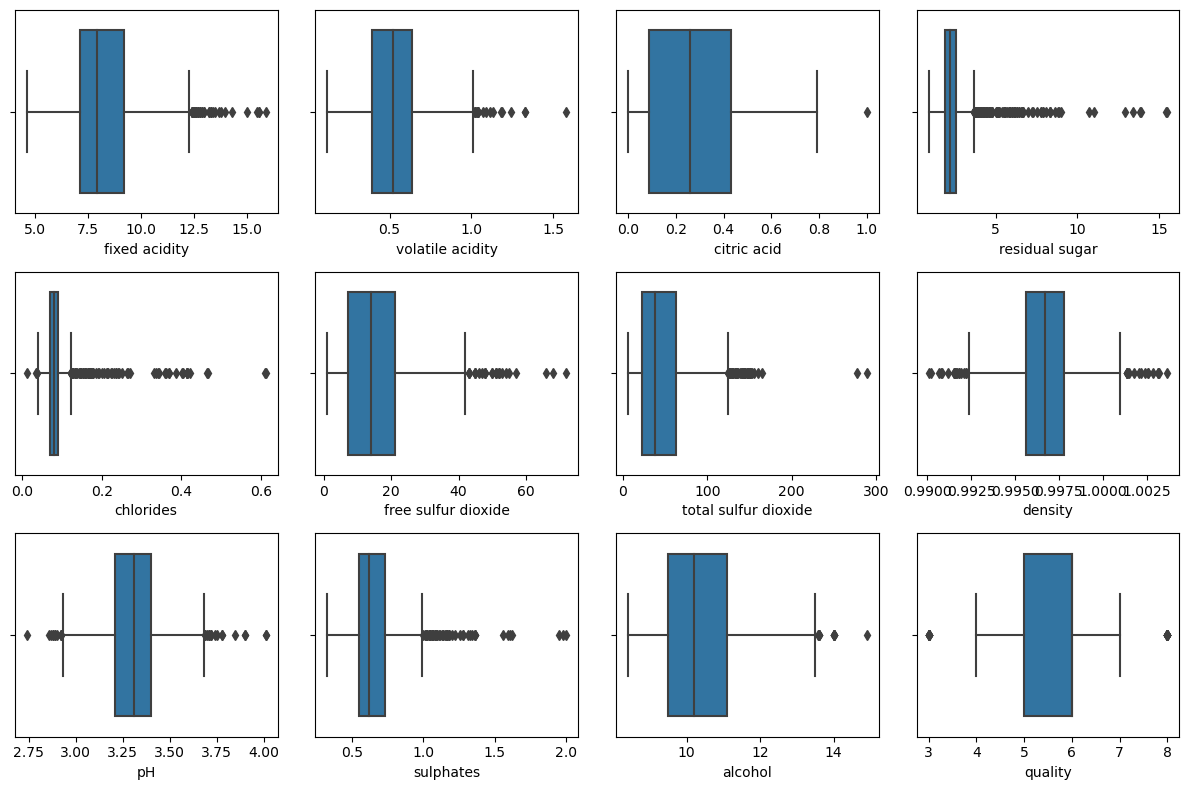

In [208]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 4, 1)
sns.boxplot(data=df, x='fixed acidity')
plt.subplot(3, 4, 2)
sns.boxplot(data=df, x='volatile acidity')
plt.subplot(3, 4, 3)
sns.boxplot(data=df, x='citric acid')
plt.subplot(3, 4, 4)
sns.boxplot(data=df, x='residual sugar')
plt.subplot(3, 4, 5)
sns.boxplot(data=df, x='chlorides')
plt.subplot(3, 4, 6)
sns.boxplot(data=df, x='free sulfur dioxide')
plt.subplot(3, 4, 7)
sns.boxplot(data=df, x='total sulfur dioxide')
plt.subplot(3, 4, 8)
sns.boxplot(data=df, x='density')
plt.subplot(3, 4, 9)
sns.boxplot(data=df, x='pH')
plt.subplot(3, 4, 10)
sns.boxplot(data=df, x='sulphates')
plt.subplot(3, 4, 11)
sns.boxplot(data=df, x='alcohol')
plt.subplot(3, 4, 12)
sns.boxplot(data=df, x='quality')

plt.tight_layout()
plt.show()

### 5. Countplot

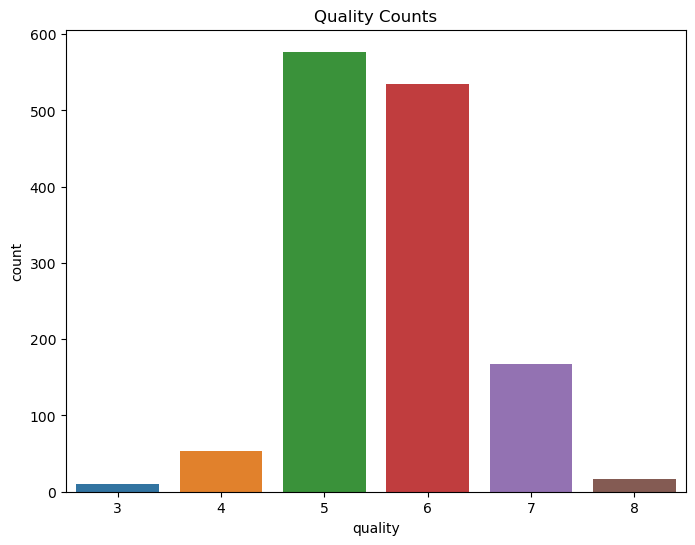

In [209]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='quality')
plt.title('Quality Counts')
plt.show()

### 6. Volatile acidity vs Quality

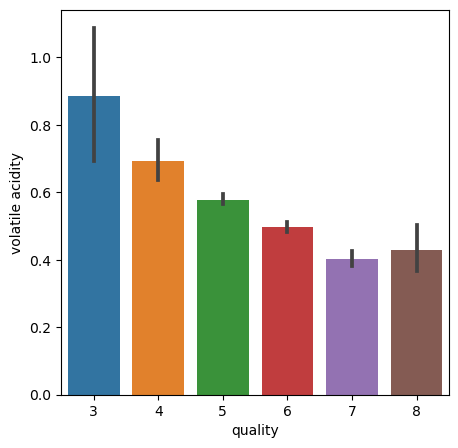

In [210]:
plot = plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='volatile acidity', data=df)
plt.show()

# Data Preprocessing

In [211]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [212]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)

In [214]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))

# Model Building

In [215]:
model = GradientBoostingClassifier()

In [216]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [254]:
y_pred = model.predict(X_test)
y_pred_labels = y_pred

# Model Evaluation

In [255]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred_labels, average='macro')
recall = recall_score(y_test, y_pred_labels, average='macro')
f1 = f1_score(y_test, y_pred_labels, average='macro')
cm = confusion_matrix(y_test, y_pred_labels)
mae = mean_absolute_error(y_test, y_pred_labels)
mape = mean_absolute_percentage_error(y_test, y_pred_labels)
loss = log_loss(y_test, y_pred_proba, labels=[3, 4, 5, 6, 7, 8])

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [256]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("Loss:", loss)

Accuracy: 64.71%
Precision: 0.30782839451570104
Recall: 0.32316370992841575
F1-score: 0.31490553244845093
Mean Absolute Error: 0.38235294117647056
Mean Absolute Percentage Error: 0.06837359943977592
Loss: 0.9696652826559893


In [231]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  5  2  0  0]
 [ 0  0 82 22  1  0]
 [ 1  0 29 75 14  0]
 [ 0  0  2 15 19  0]
 [ 0  0  0  0  4  0]]


# Building a Predictive System

In [221]:
input_data = np.random.rand(10, 11)
scaled_input_data = scaler.transform(input_data)
for sample in scaled_input_data:
    sample_reshaped = sample.reshape(1, -1)
    prediction = model.predict(sample_reshaped)
    if prediction[0] == 1:
        print('Good Quality Wine')
    else:
        print('Bad Quality Wine')

Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
